Script to perform exploratory data analysis on the Indicators of Heart
Disease dataset. Before anything else, the data must be loaded and split
into training and testing sets. The training set will be used to create the
ideas and hypotheses, while the testing set will be used to validate them.

In [38]:
import pandas as pd

In [39]:
def load_data():
    """Load the Indicators of Heart Disease dataset"""
    df_train = pd.read_csv('../data/heart_train.csv')
    return df_train

In [40]:
data = load_data()

In [41]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Utah,Female,Very good,0.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,7.0,None of them,No,...,1.60,51.71,20.19,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
1,District of Columbia,Female,Fair,4.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.60,54.43,21.26,No,No,No,Yes,NaN,No,No
2,Washington,Male,Good,1.0,1.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,88.45,30.54,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
3,Wisconsin,Female,Good,0.0,0.0,Within past 5 years (2 years but less than 5 y...,No,9.0,"6 or more, but not all",No,...,1.68,69.40,24.69,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
4,Kansas,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.75,108.86,35.44,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356105 entries, 0 to 356104
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      356105 non-null  object 
 1   Sex                        356105 non-null  object 
 2   GeneralHealth              355168 non-null  object 
 3   PhysicalHealthDays         347414 non-null  float64
 4   MentalHealthDays           348848 non-null  float64
 5   LastCheckupTime            349508 non-null  object 
 6   PhysicalActivities         355234 non-null  object 
 7   SleepHours                 351756 non-null  float64
 8   RemovedTeeth               347063 non-null  object 
 9   HadHeartAttack             353632 non-null  object 
 10  HadAngina                  352578 non-null  object 
 11  HadStroke                  354855 non-null  object 
 12  HadAsthma                  354698 non-null  object 
 13  HadSkinCancer              35

In [43]:
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,347414.000000,348848.000000,351756.000000,333363.000000,322538.000000,317239.000000
mean,4.353046,4.381794,7.021117,1.702585,83.074472,28.532016
std,8.695588,8.388430,1.503170,0.107053,21.455636,6.554786
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [44]:
data.isnull().sum()

State                            0
Sex                              0
GeneralHealth                  937
PhysicalHealthDays            8691
MentalHealthDays              7257
LastCheckupTime               6597
PhysicalActivities             871
SleepHours                    4349
RemovedTeeth                  9042
HadHeartAttack                2473
HadAngina                     3527
HadStroke                     1250
HadAsthma                     1407
HadSkinCancer                 2543
HadCOPD                       1743
HadDepressiveDisorder         2220
HadKidneyDisease              1519
HadArthritis                  2087
HadDiabetes                    865
DeafOrHardOfHearing          16402
BlindOrVisionDifficulty      17143
DifficultyConcentrating      19276
DifficultyWalking            19070
DifficultyDressingBathing    19012
DifficultyErrands            20405
SmokerStatus                 28274
ECigaretteUsage              28412
ChestScan                    44791
RaceEthnicityCategor

In [46]:
# Write the columns to a text file
with open('../data/columns.txt', 'w') as f:
    for col in data.columns:
        f.write(f'{col}\n')

# Analyzing each column

## State

In [47]:
data["State"].isna().sum() / len(data)

0.0

In [48]:
data["State"].nunique()

54

The State column doesn't have any missing values and has 54 unique values. This column is a categorical column.

## Sex

In [49]:
data["Sex"].isna().sum()/len(data) * 100

0.0

In [50]:
data["Sex"].value_counts(normalize=True)

Sex
Female    0.530082
Male      0.469918
Name: proportion, dtype: float64

The Sex column doesn't have any missing values and has 2 unique values. This column is a categorical column.
Also, the proportion of males and females is not equal, but the difference is not that big.

## GeneralHealth

In [51]:
data["GeneralHealth"].isna().sum()/len(data) * 100

0.2631246402044341

In [52]:
data["GeneralHealth"].value_counts(normalize=True)

GeneralHealth
Very good    0.334557
Good         0.323512
Excellent    0.161594
Fair         0.135806
Poor         0.044531
Name: proportion, dtype: float64

<Axes: >

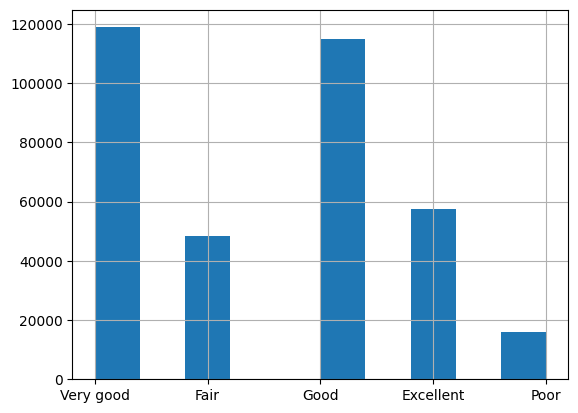

In [53]:
data["GeneralHealth"].hist()

The GeneralHealth column has missing values (0.26%) and has 5 unique values. This column is a categorical column. It's poor balanced, with the majority of the values being "Good", "Very Good" and "Excellent", which can be a problem for the model. The number of NAs is not that big, so we can consider removing them. For some models, it must be transformed into a numerical column.

## PhysicalHealthDays

In [54]:
data["PhysicalHealthDays"].isna().sum() / len(data) * 100

2.440572303112846

<Axes: >

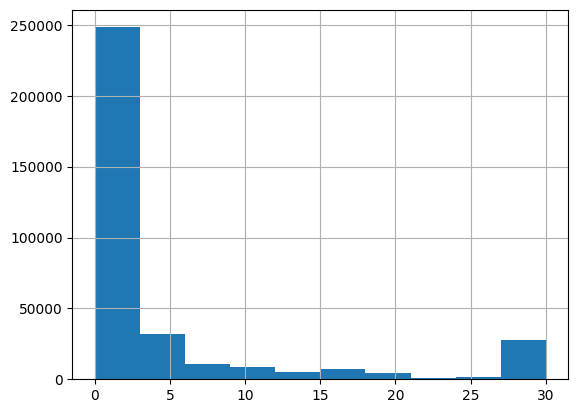

In [55]:
data["PhysicalHealthDays"].hist()

In [56]:
data["PhysicalHealthDays"].value_counts(normalize=True)

PhysicalHealthDays
0.0     0.616685
30.0    0.076367
2.0     0.058366
1.0     0.039662
3.0     0.036628
5.0     0.034961
10.0    0.024582
7.0     0.021571
15.0    0.019976
4.0     0.019553
20.0    0.012633
14.0    0.011531
6.0     0.005812
25.0    0.004965
8.0     0.004148
12.0    0.002614
21.0    0.002389
28.0    0.001741
9.0     0.000959
29.0    0.000826
18.0    0.000659
16.0    0.000587
27.0    0.000452
17.0    0.000417
13.0    0.000394
22.0    0.000331
11.0    0.000328
24.0    0.000296
26.0    0.000265
23.0    0.000201
19.0    0.000101
Name: proportion, dtype: float64

The PhysicalHealthDays column has missing values (2.44%) and is discrete. This column has a high number of zeros, which can be a problem for the model. The number of NAs is not that big, so we can consider removing them.

## MentalHealthDays

In [57]:
data["MentalHealthDays"].isna().sum() / len(data) * 100

2.037882085339998

<Axes: >

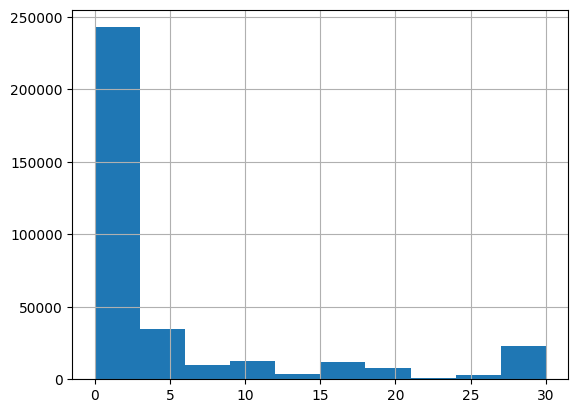

In [58]:
data["MentalHealthDays"].hist()

The MentalHealthDays column has missing values (2.04%) and is discrete. This column has a high number of zeros, which can be a problem for the model. The number of NAs is not that big, so we can consider removing them.

## LastCheckupTime

In [59]:
data["LastCheckupTime"].isna().sum() / len(data) * 100

1.8525434913859675

In [60]:
data["LastCheckupTime"].value_counts(normalize=True)

LastCheckupTime
Within past year (anytime less than 12 months ago)         0.804113
Within past 2 years (1 year but less than 2 years ago)     0.095620
Within past 5 years (2 years but less than 5 years ago)    0.056594
5 or more years ago                                        0.043673
Name: proportion, dtype: float64

The LastCheckupTime column has missing values (1.852%) and has 4 unique values. This column is a categorical column. It's poor balanced, with the majority of the values being "Within past year (anytime less than 12 months ago)", which can be a problem for the model. The number of NAs is not that big, so we can consider removing them. For some models, it must be transformed into a numerical column.

## PhysicalActivities

In [62]:
data["PhysicalActivities"].isna().sum() / len(data) * 100

0.24459078080903107

In [63]:
data["PhysicalActivities"].value_counts(normalize=True)

PhysicalActivities
Yes    0.759955
No     0.240045
Name: proportion, dtype: float64

The PhysicalActivities column has missing values (0.244%) and is categorical.

The number of NAs is not that big, so we can consider removing them.

For some models, it must be transformed into a numerical column.

## SleepHours

In [64]:
data["SleepHours"].isna().sum() / len(data) * 100

1.2212690077364823

In [65]:
data["SleepHours"].value_counts(normalize=True)

SleepHours
7.0     0.302121
8.0     0.285098
6.0     0.218319
5.0     0.068565
9.0     0.048107
4.0     0.028611
10.0    0.023761
3.0     0.007360
12.0    0.006823
2.0     0.003508
1.0     0.002652
11.0    0.001527
15.0    0.000756
16.0    0.000748
14.0    0.000677
13.0    0.000367
18.0    0.000361
20.0    0.000321
24.0    0.000122
17.0    0.000063
23.0    0.000043
19.0    0.000043
22.0    0.000040
21.0    0.000009
Name: proportion, dtype: float64

The SleepHours column has missing values (1.221%) and is discrete.

The number of NAs is not that big, so we can consider removing them.

But this column has some values that are not common, like 24 hours of sleep. We must remove these values.

## RemovedTeeth

In [66]:
data["RemovedTeeth"].isna().sum() / len(data) * 100

2.5391387371702168

In [67]:
data["RemovedTeeth"].value_counts(normalize=True)

RemovedTeeth
None of them              0.538721
1 to 5                    0.297568
6 or more, but not all    0.105211
All                       0.058499
Name: proportion, dtype: float64

The column RemovedTeeth has missing values (2.539%) and is categorical.

The number of NAs is not that big, so we can consider removing them.

For some models, it must be transformed into a numerical column.

## HadHeartAttack

In [70]:
data["HadHeartAttack"]

0          No
1          No
2          No
3          No
4          No
         ... 
356100     No
356101    Yes
356102     No
356103     No
356104     No
Name: HadHeartAttack, Length: 356105, dtype: object

In [68]:
data["HadHeartAttack"].isna().sum() / len(data) * 100

0.694458095224723

In [71]:
data["HadHeartAttack"].value_counts()

HadHeartAttack
No     333575
Yes     20057
Name: count, dtype: int64

The HadHeartAttack column has missing values (0.69445%) and is categorical.

The number of NAs is not that big, so we can consider removing them.

For some models, it must be transformed into a numerical column.